# Statistical study

In [1]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load Data
data = pd.read_csv('Resources/diabetes_012_health_indicators_BRFSS2015.csv')
# Display sample data
data.head(10)

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
5,0.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,2.0,0.0,1.0,10.0,6.0,8.0
6,0.0,1.0,0.0,1.0,30.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,3.0,0.0,14.0,0.0,0.0,9.0,6.0,7.0
7,0.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,0.0,0.0,1.0,0.0,11.0,4.0,4.0
8,2.0,1.0,1.0,1.0,30.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,5.0,30.0,30.0,1.0,0.0,9.0,5.0,1.0
9,0.0,0.0,0.0,1.0,24.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,8.0,4.0,3.0


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [3]:
# Generate summary statistics
data.describe()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.296921,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.698160,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


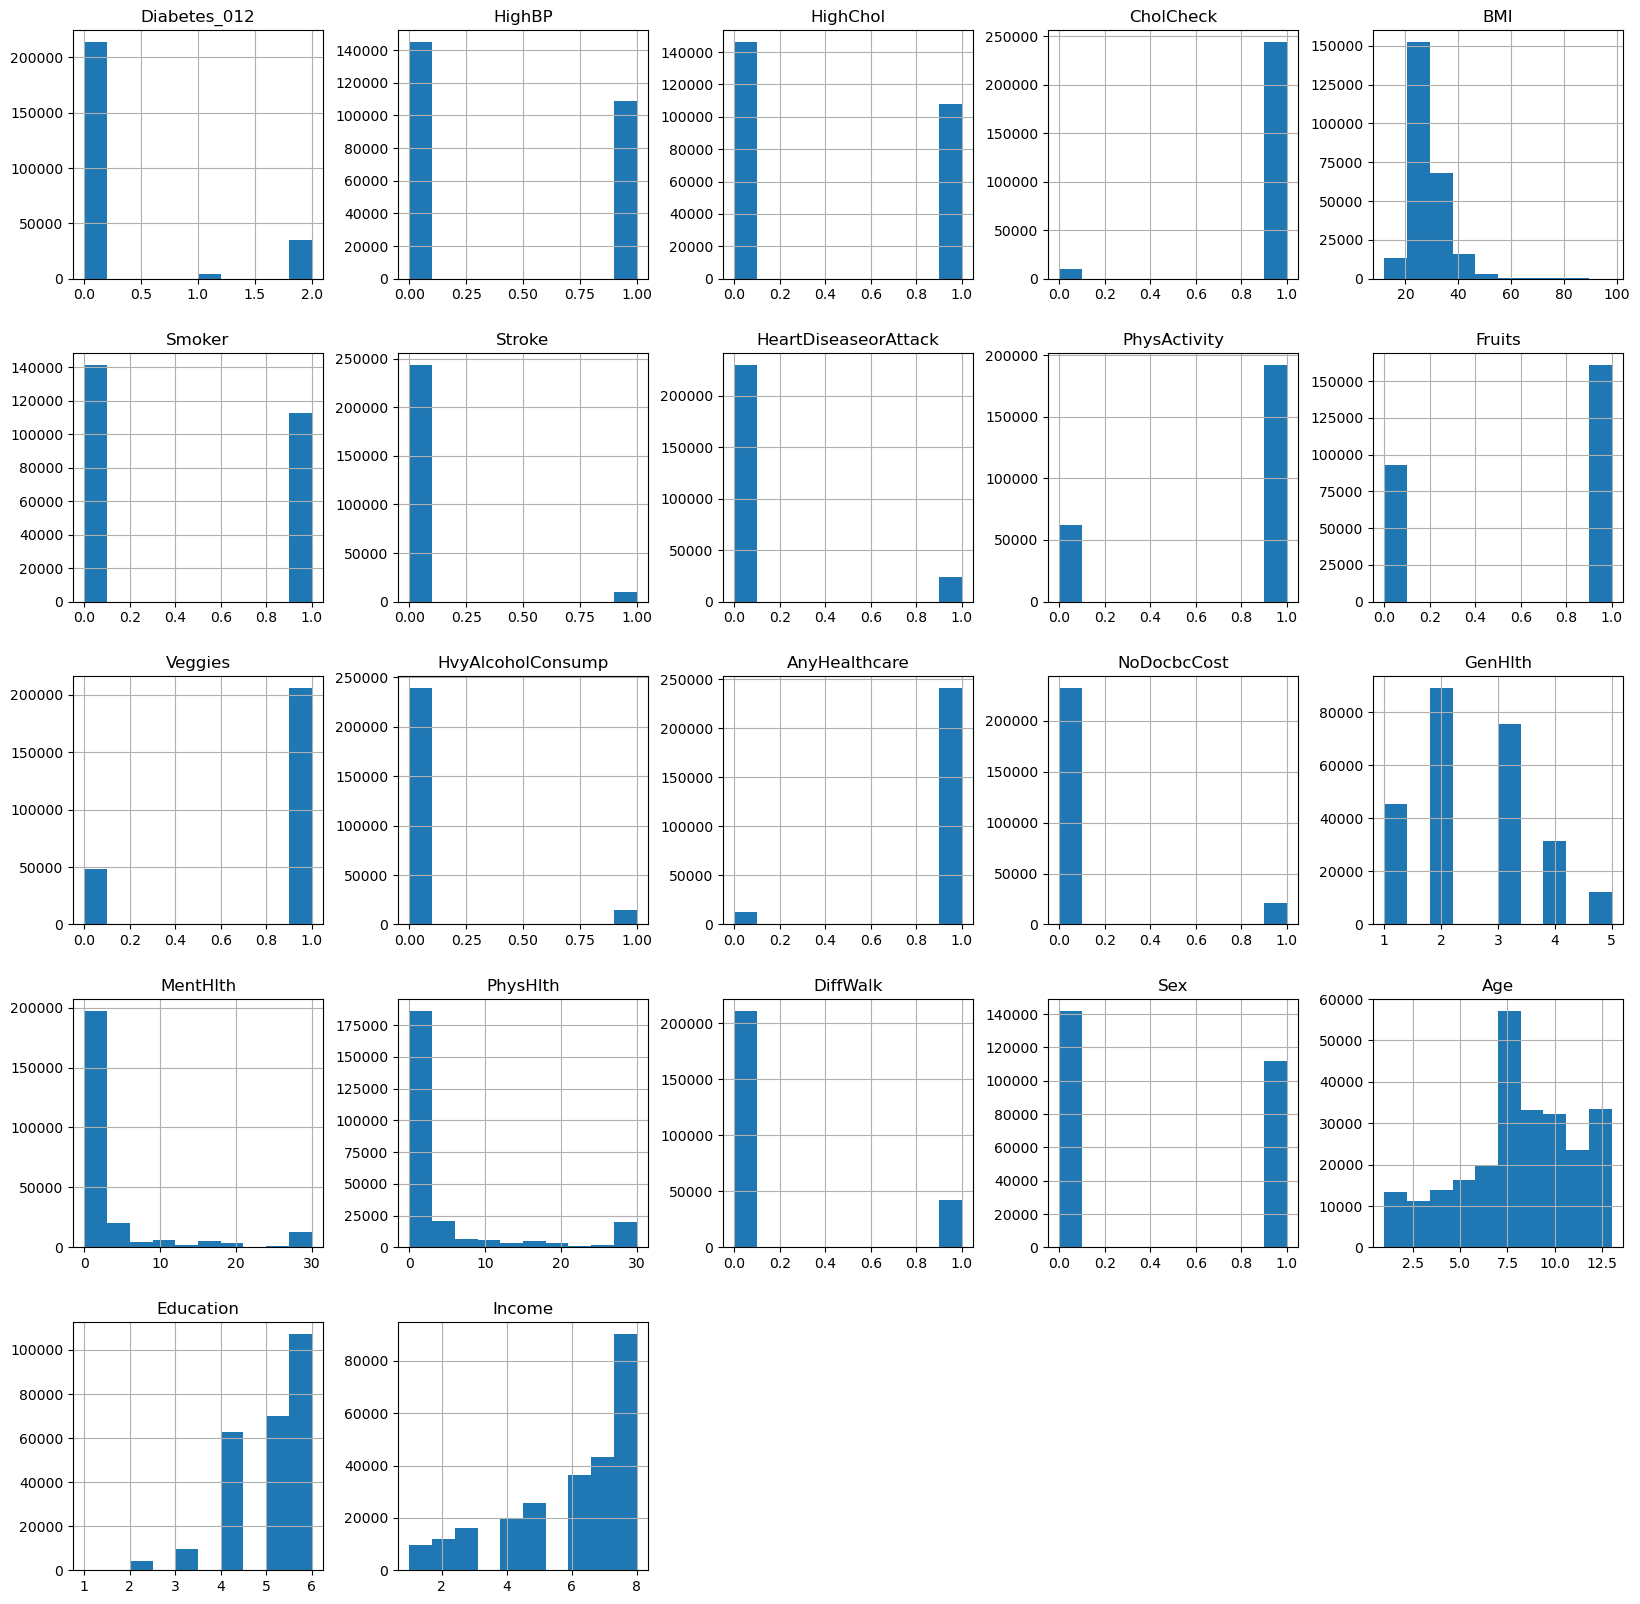

In [4]:
data.hist(figsize = (20,20))
plt.show()

# Correlation between attributes

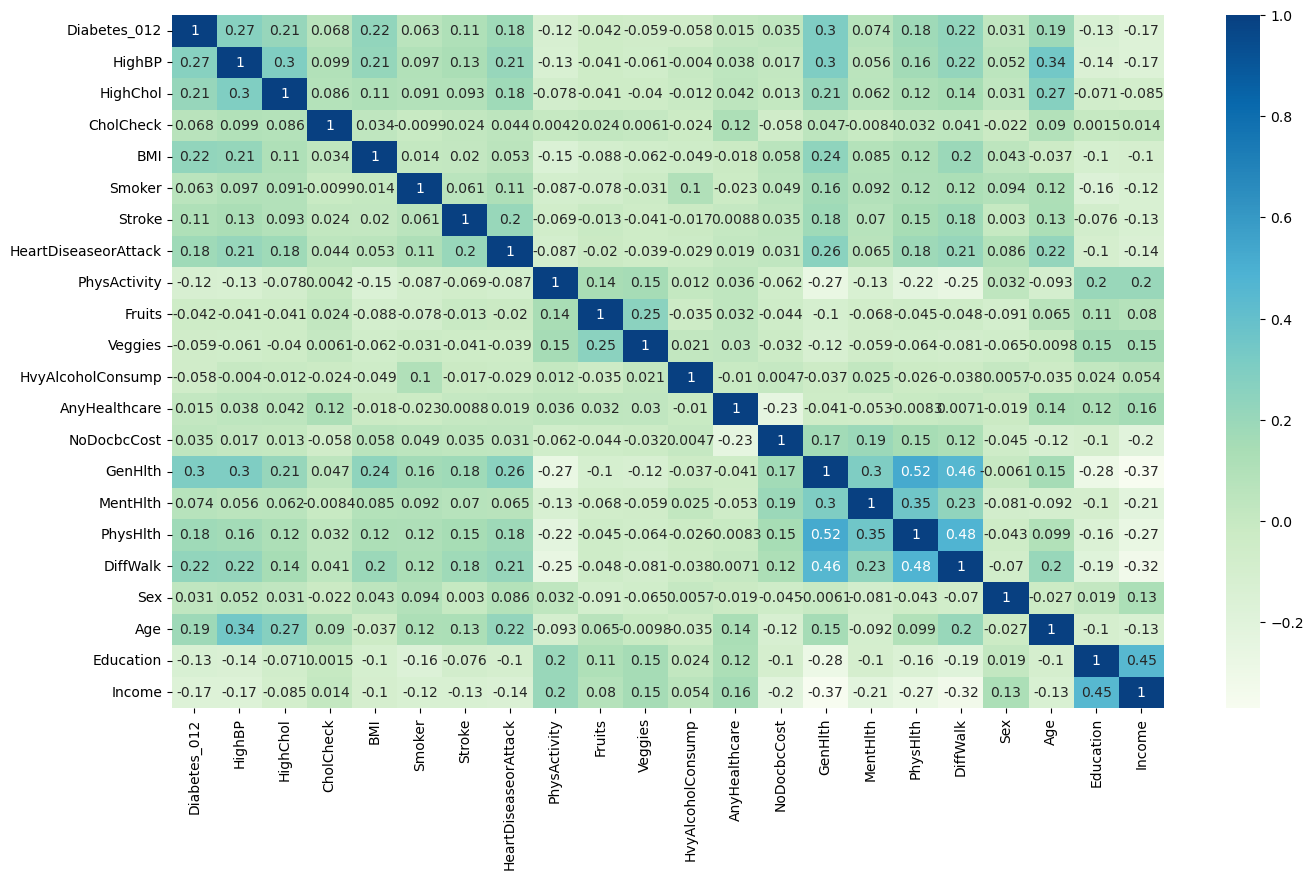

In [5]:
plt.figure(figsize=(16,9))
sns.heatmap(data.corr(), annot=True, cmap ='GnBu');

# Correlation with Diabetes through bar graph

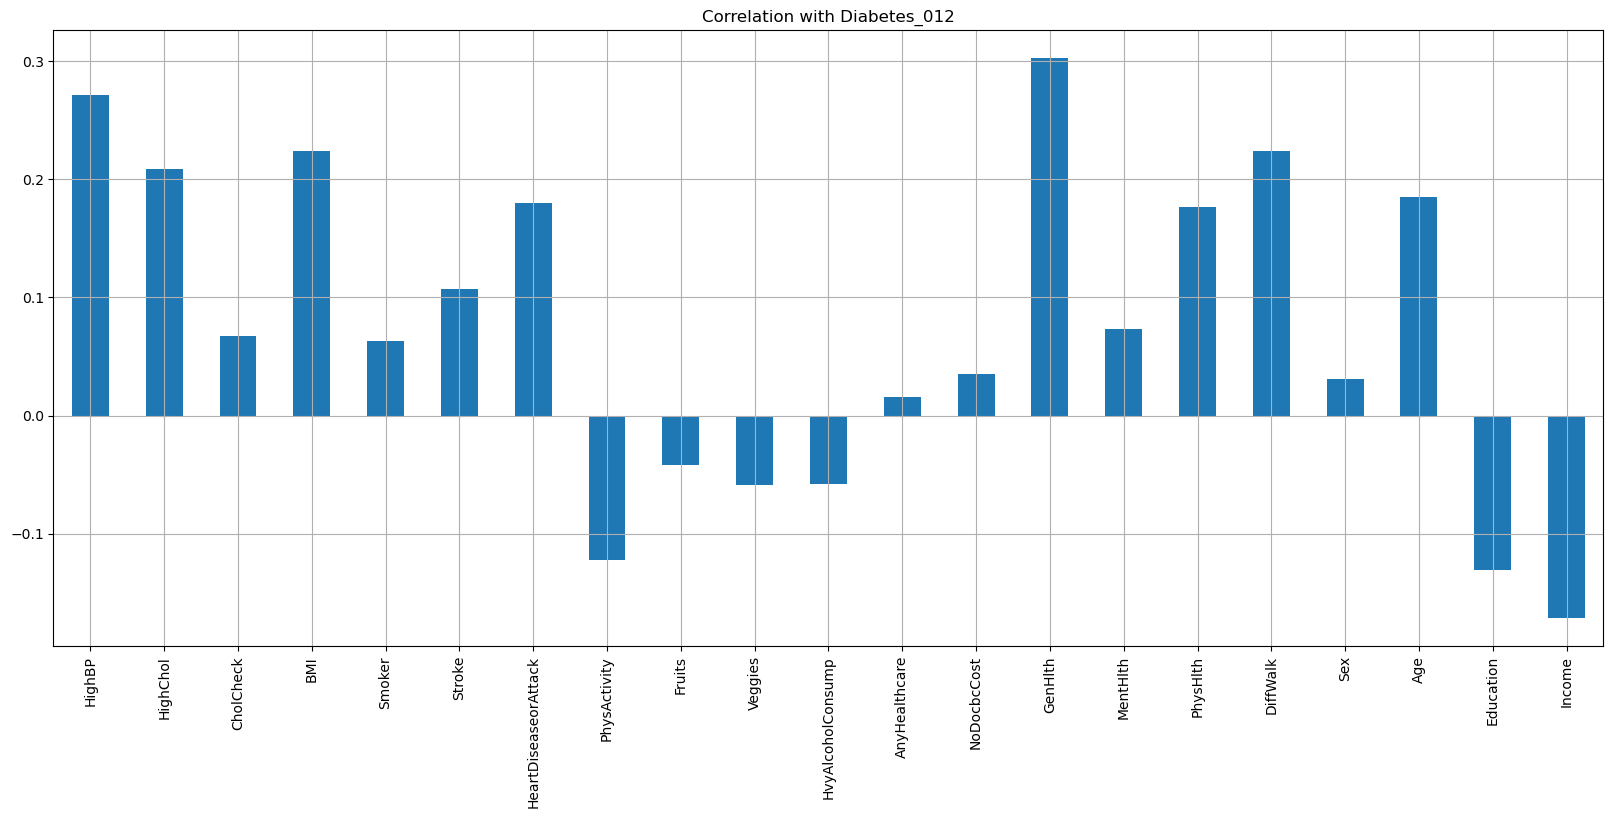

In [6]:
data.drop('Diabetes_012', axis=1).corrwith(data.Diabetes_012).plot(kind='bar', grid=True, figsize=(20, 8)
, title="Correlation with Diabetes_012");

## Diabetes_012's relation with other columns Through bar Graph Result:
HighBP , HighChol , BMI, stroke , HeartDiseaseorAttack , PhysActivity , Veggies , HvyAlcoholconsump , GenHlth , PhysHlth , Age , Education , Income and DiffWalk have a significant correlation with Diabetes_binary.

In [7]:
#Replacing 0 into Non-Diabetic, 1 into Diabetic type 1 and 2 into Diabetic type 2 
#adding new column Diabetes_binary_str  

data["Diabetes_012_str"]= data["Diabetes_012"].replace({0:"NOn-Diabetic",1:"Diabetic type 1", 2:"Diabetic type 2"})

In [8]:
#average of column Daibetes_012 
# 0 for non-Diabetic person and 1 for Diabetic person

data["Diabetes_012_str"].value_counts()

Diabetes_012_str
NOn-Diabetic       213703
Diabetic type 2     35346
Diabetic type 1      4631
Name: count, dtype: int64

# 1) Correlation between Diabetes and Stroke:

In [9]:
# Calculate the correlation coefficient between 'Stroke' and 'Diabetes_012'
correlation = data['Stroke'].corr(data['Diabetes_012'])

print("Correlation between Stroke and Diabetes:", correlation)

Correlation between Stroke and Diabetes: 0.10717866994339746


A correlation coefficient of 0.107 indicates a very weak positive correlation between strokes and diabetes. This means that there is a very slight tendency for individuals with diabetes to have a slightly higher likelihood of experiencing strokes, but the correlation is not strong.

C:\Users\yrang\anaconda3\envs\dev\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


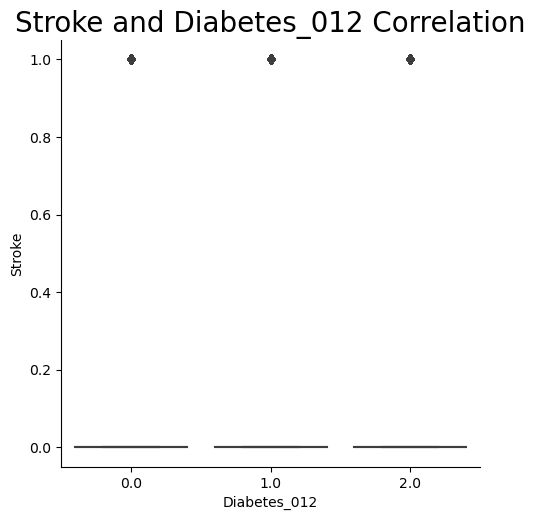

In [10]:
p=sns.catplot(x="Diabetes_012",y="Stroke", data=data, kind='box')
plt.title("Stroke and Diabetes_012 Correlation", size=20, y=1.0);

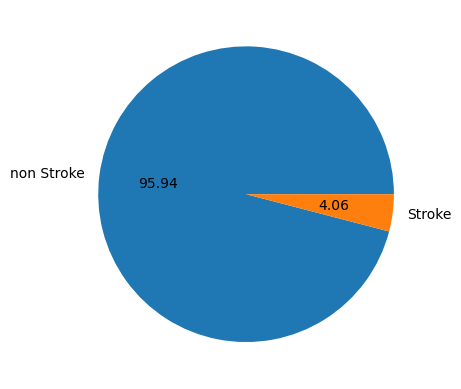

In [11]:
#checking HighBP and non HighBP pepoles average by pie 

labels=["non Stroke","Stroke"]

plt.pie(data["Stroke"].value_counts() , labels =labels ,autopct='%.02f' );

In [12]:
#number of Diabetic patient with Stroke

pd.crosstab(data.Stroke,data.Diabetes_012_str)

Diabetes_012_str,Diabetic type 1,Diabetic type 2,NOn-Diabetic
Stroke,,,
0.0,4366,32078,206944
1.0,265,3268,6759


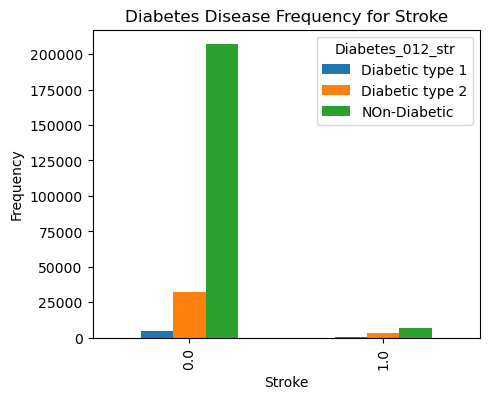

In [13]:
#Checking The relation B/W HighBP and Diabetes

pd.crosstab(data.Stroke,data.Diabetes_012_str).plot(kind="bar",figsize=(5,4))

plt.title('Diabetes Disease Frequency for Stroke')
plt.xlabel("Stroke")
plt.ylabel('Frequency')
plt.show()

In [14]:
# checking average of diabetic persons with Stroke and NO Stroke

(data.groupby("Diabetes_012_str")["Stroke"].value_counts()/data.groupby("Diabetes_012_str")["Stroke"].count())*100

Diabetes_012_str  Stroke
Diabetic type 1   0.0       94.277694
                  1.0        5.722306
Diabetic type 2   0.0       90.754258
                  1.0        9.245742
NOn-Diabetic      0.0       96.837199
                  1.0        3.162801
dtype: float64

# Result:

1) Diabetic type 1:

94.28% of individuals with type 1 diabetes did not experience a stroke, while only 5.72% did.
This suggests that individuals with type 1 diabetes have a relatively low probability of experiencing a stroke compared to those who do not have it.

2) Diabetic type 2:

90.75% of individuals with type 2 diabetes did not experience a stroke, while 9.25% did.
Similar to type 1 diabetes, individuals with type 2 diabetes also have a relatively low probability of experiencing a stroke.

3) Non-Diabetic:

96.84% of non-diabetic individuals did not experience a stroke, while only 3.16% did.
This indicates that individuals without diabetes have the lowest probability of experiencing a stroke compared to individuals with type 1 and type 2 diabetes.

Conclusion:

While there is a difference in stroke rates between individuals with and without diabetes, it's important to note that the majority of individuals, regardless of diabetes status, do not experience a stroke.
However, individuals with diabetes, both type 1 and type 2, appear to have a slightly higher probability of experiencing a stroke compared to those without diabetes.
This underscores the importance of diabetes management and control to reduce the risk of complications such as strokes.


# 2) Correlation between Diabetes and Heart Diseaseor Attack:

C:\Users\yrang\anaconda3\envs\dev\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


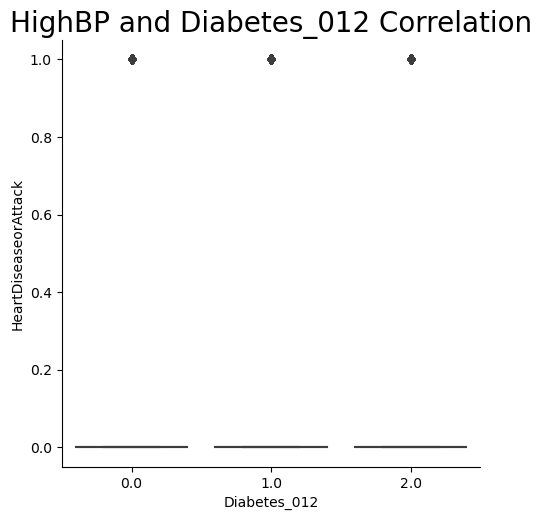

In [15]:
p=sns.catplot(x="Diabetes_012",y="HeartDiseaseorAttack", data=data, kind='box')
plt.title("HighBP and Diabetes_012 Correlation", size=20, y=1.0);

# Correlation >=0.2

# Correlation between Diabetes and HighBP:

C:\Users\yrang\anaconda3\envs\dev\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


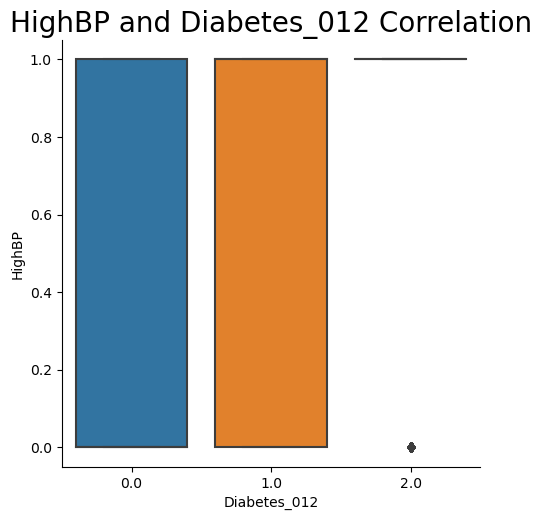

In [16]:
p=sns.catplot(x="Diabetes_012",y="HighBP", data=data, kind='box')
plt.title("HighBP and Diabetes_012 Correlation", size=20, y=1.0);

# Correlation between Diabetes and High cholesterol:

C:\Users\yrang\anaconda3\envs\dev\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


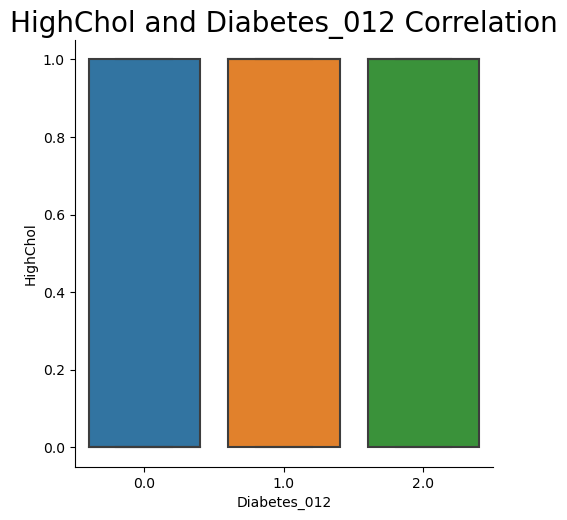

In [17]:
p=sns.catplot(x="Diabetes_012",y="HighChol", data=data, kind='box')
plt.title("HighChol and Diabetes_012 Correlation", size=20, y=1.0);

# Correlation between Diabetes and BMI:

C:\Users\yrang\anaconda3\envs\dev\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


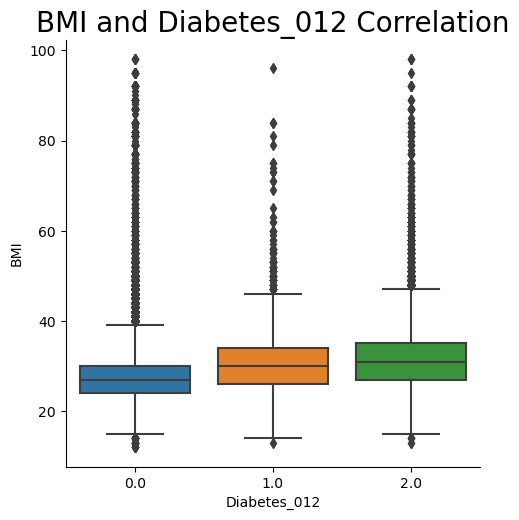

In [18]:
p=sns.catplot(x="Diabetes_012",y="BMI", data=data, kind='box')
plt.title("BMI and Diabetes_012 Correlation", size=20, y=1.0);

# Correlation between Diabetes and General health:

C:\Users\yrang\anaconda3\envs\dev\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


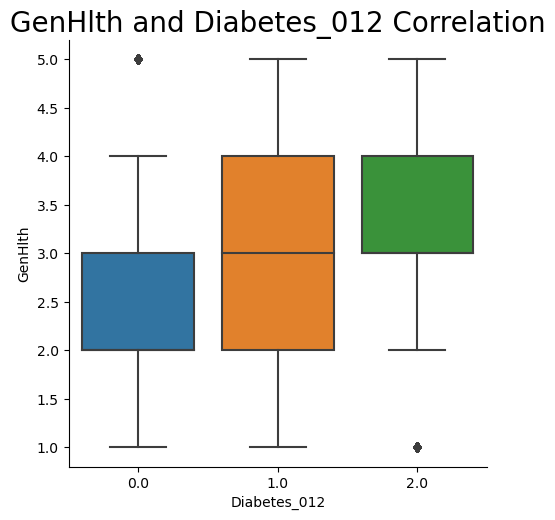

In [19]:
p=sns.catplot(x="Diabetes_012",y="GenHlth", data=data, kind='box')
plt.title("GenHlth and Diabetes_012 Correlation", size=20, y=1.0);

# Correlation between Diabetes and serious difficulty walking or climbing stairs:

C:\Users\yrang\anaconda3\envs\dev\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


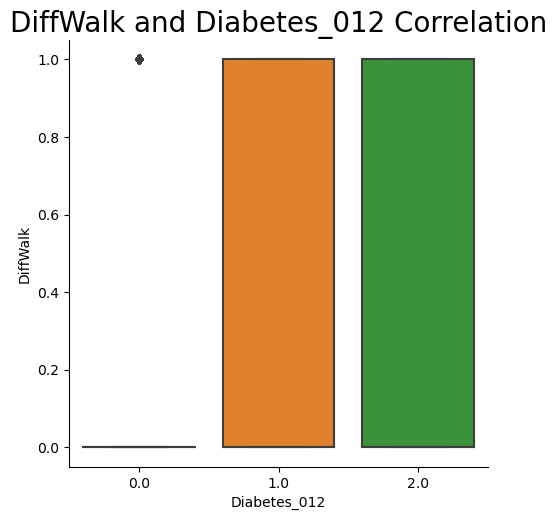

In [20]:
p=sns.catplot(x="Diabetes_012",y="DiffWalk", data=data, kind='box')
plt.title("DiffWalk and Diabetes_012 Correlation", size=20, y=1.0);

C:\Users\yrang\anaconda3\envs\dev\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


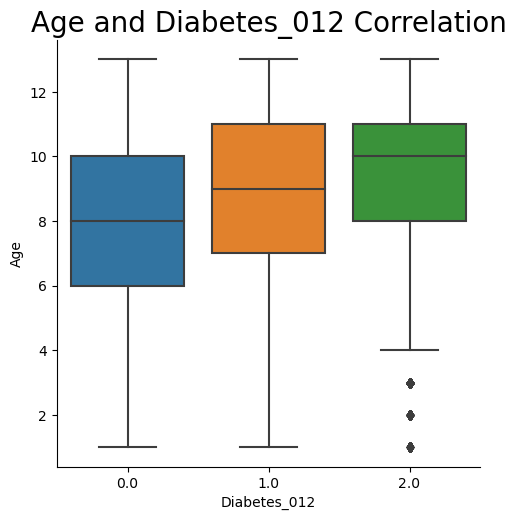

In [21]:
p=sns.catplot(x="Diabetes_012",y="Age", data=data, kind='box')
plt.title("Age and Diabetes_012 Correlation", size=20, y=1.0);